In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder #preprossing techeniques
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

In [49]:
df = pd.read_csv("insurance.csv")

In [50]:
df = df.loc[:,~df.columns.str.contains('^Unnamed:')]
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [51]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [53]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [54]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [55]:
df.shape

(1338, 7)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [57]:
df.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [58]:
pd.set_option('display.max_columns', None)
df.describe(include="all").round(2)

,age,sex,bmi,children,smoker,region,charges
count,1338.00,1338,1338.00,1338.00,1338,1338,1338.00
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.21,NaN,30.66,1.09,NaN,NaN,13270.42
std,14.05,NaN,6.10,1.21,NaN,NaN,12110.01
min,18.00,NaN,15.96,0.00,NaN,NaN,1121.87
25%,27.00,NaN,26.30,0.00,NaN,NaN,4740.29
50%,39.00,NaN,30.40,1.00,NaN,NaN,9382.03
75%,51.00,NaN,34.69,2.00,NaN,NaN,16639.91


In [59]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [60]:
df['sex'].nunique()

2

In [61]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [62]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [63]:
# Fill missing values with mean
df['children'] = df['children'].fillna(df['children'].mean())

# Fill missing values with median
df['age'] = df['age'].fillna(df['age'].median())

# Drop rows with any missing value
df_drop = df.dropna()

print(df)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [64]:
print(df.duplicated().sum())

1


In [65]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [66]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [67]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [68]:
df['region']=LabelEncoder().fit_transform(df['region'])
df['sex']=LabelEncoder().fit_transform(df['sex'])
df['smoker']=LabelEncoder().fit_transform(df['smoker'])

In [69]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [70]:
X = df.drop('smoker', axis=1)
y = df['smoker']
y
X

,age,sex,bmi,children,region,charges
0,19,0,27.900,0,3,16884.92400
1,18,1,33.770,1,2,1725.55230
2,28,1,33.000,3,2,4449.46200
3,33,1,22.705,0,1,21984.47061
4,32,1,28.880,0,1,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,2,1629.83350
1336,21,0,25.800,0,3,2007.94500


In [71]:
#scaler numerical features
#preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.34390459,
         0.2985838 ],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719,  0.43849455,
        -0.95368917],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576,  0.43849455,
        -0.72867467],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367,  0.43849455,
        -0.96159623],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367,  1.34390459,
        -0.93036151],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367, -0.46691549,
         1.31105347]], shape=(1338, 6))

In [72]:
#train test split

from sklearn.model_selection import train_test_split

#simple train-test-split

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)
print("Train size:",x_train.shape,"Test Size:",x_test.shape)

Train size: (1070, 6) Test Size: (268, 6)


In [73]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix #result checking tech
from sklearn.ensemble import RandomForestClassifier

print("-------------Random Forest Algorithm:---------------")

model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

-------------Random Forest Algorithm:---------------
Accuracy: 0.9701492537313433
Confusion Matrix:
 [[208   6]
 [  2  52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       214
           1       0.90      0.96      0.93        54

    accuracy                           0.97       268
   macro avg       0.94      0.97      0.95       268
weighted avg       0.97      0.97      0.97       268



In [74]:
#check svm model and gradientboosting

print("-------------Support Vector MAchine Algorithm:---------------")
from sklearn.svm import SVC

# SVM
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))
print("-----------------Gradient Boosting Accuracy:-----------------")
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))

-------------Support Vector MAchine Algorithm:---------------
Accuracy: 0.9664179104477612
Confusion Matrix:
 [[206   8]
 [  1  53]]
-----------------Gradient Boosting Accuracy:-----------------
Accuracy: 0.9664179104477612
Confusion Matrix:
 [[206   8]
 [  1  53]]


In [75]:
#check regression

# algorithm 1
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate
print("-----Linear Regression Results:-----------")
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
# Metrics
print("MAE-> mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("MSE-> mean_squared_error:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

print("------------------------------------")
print("--------Lasso Regression Results:--------")
from sklearn.linear_model import Lasso

# Model
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

# Metrics
print("MAE-> mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("MSE-> mean_squared_error:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


# Evaluate
print("------------Ridge Regression Results:---------")
from sklearn.linear_model import Ridge

# Model
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

# Metrics
print("MAE-> mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("MSE-> mean_squared_error:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


-----Linear Regression Results:-----------
MAE-> mean_absolute_error: 0.1187353524441786
MSE-> mean_squared_error: 0.04153118534806766
RMSE: 0.20379201492714985
R2 Score: 0.7418712481447203
------------------------------------
--------Lasso Regression Results:--------
MAE-> mean_absolute_error: 0.32424326963314265
MSE-> mean_squared_error: 0.1609102274460521
RMSE: 0.40113617070273294
R2 Score: -0.00010524195960948113
------------Ridge Regression Results:---------
MAE-> mean_absolute_error: 0.32424326963314265
MSE-> mean_squared_error: 0.1609102274460521
RMSE: 0.40113617070273294
R2 Score: -0.00010524195960948113


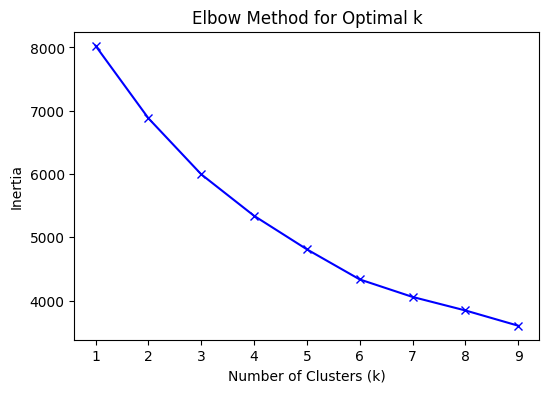

🔹 K-Means Clustering Results:
   age  sex  region  Cluster
0   19    0       3        1
1   18    1       2        1
2   28    1       2        1
3   33    1       1        0
4   32    1       1        0

🔹 Cluster Summary:
               age    region
Cluster                     
0        37.345351  0.489564
1        33.942060  2.493562
2        49.162319  1.762319


In [76]:
# -------------------------------
# 🌀 Step 7: Clustering using KMeans
# -------------------------------
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use scaled data (X_scaled) for clustering
# Decide number of clusters using Elbow Method
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose optimal number of clusters (example: k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to data
df['Cluster'] = kmeans.labels_

# Display sample results
print("🔹 K-Means Clustering Results:")
print(df[['age', 'sex', 'region', 'Cluster']].head())

# Analyze each cluster
cluster_summary = df.groupby('Cluster')[['age', 'region']].mean()
print("\n🔹 Cluster Summary:")
print(cluster_summary)



In [77]:
#EDA

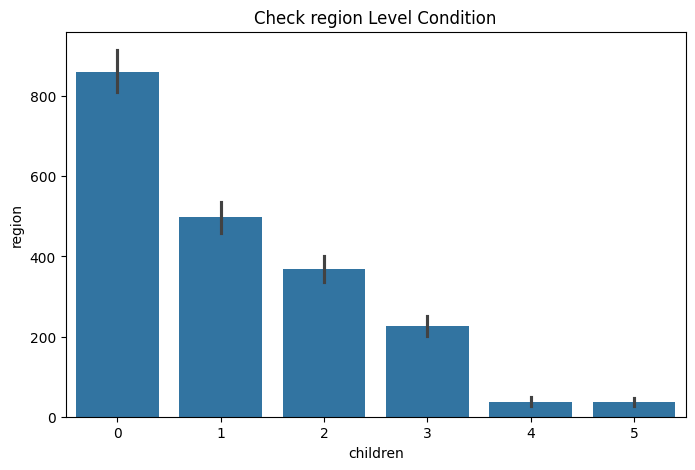

In [78]:
#predict medical level

plt.figure(figsize=(8,5))
sns.barplot(x="children", y="region", data=df, estimator=sum)
plt.title("Check region Level Condition")
plt.show()


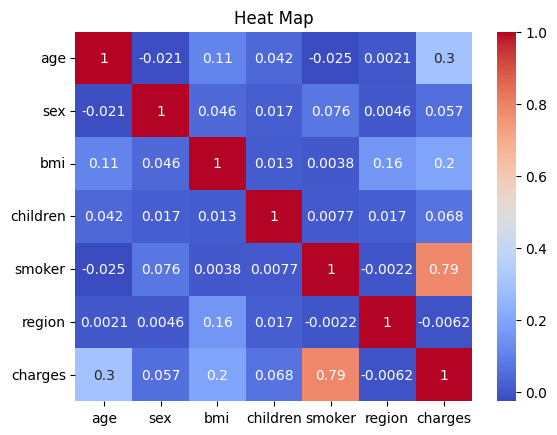

In [79]:
selected = ['age','sex','bmi','children','smoker','region','charges']
sns.heatmap(df[selected].corr(numeric_only=True),annot=True, cmap="coolwarm")#annotation written a values in map with in the box
plt.title("Heat Map")
plt.show()

               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges      Cluster  
count  1338.000000   1338.000000  1338.000000  
mean      1.515695  13270.422265     0.863976  
std       1.104885  12110.011237     0.796047  
min       0.000000   1121.873900     0.000000  
25%       1.000000   4740.287150     0.000000  
50%       2.000000   9382.033000     1.000000

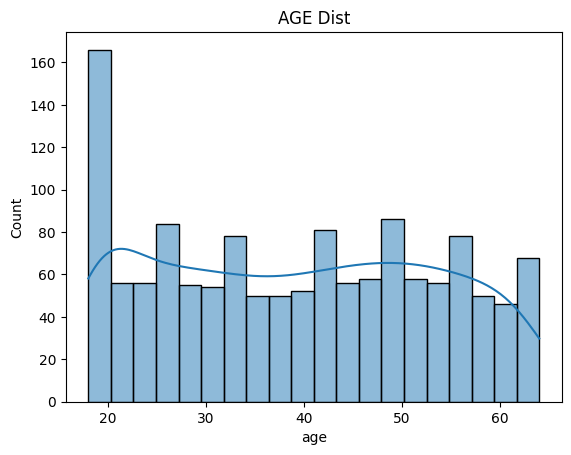

In [80]:
print(df.describe())
sns.histplot(df['age'],bins=20,kde=True)
plt.title('AGE Dist')
plt.show()

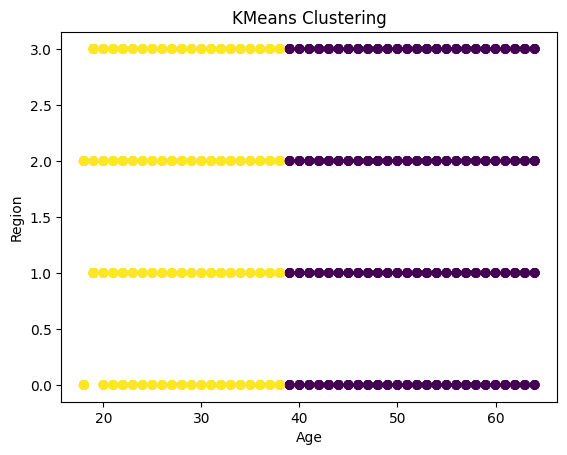

In [81]:
x_cluster=df[['age','region']] #Unsupervise Algorithm

kmeans=KMeans(n_clusters=2, random_state=42)
df['cluster']=kmeans.fit_predict(x_cluster)

plt.scatter(df['age'],df['region'],c=df['cluster'],cmap = 'viridis')
plt.xlabel("Age")
plt.ylabel("Region")
plt.title("KMeans Clustering")
plt.show()

In [82]:
#Computer Neural Network processing (CNN)

In [83]:
 from sklearn.neural_network import MLPClassifier
 from sklearn.datasets import load_iris
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import accuracy_score
 # Load the Insurance dataset
 df = pd.read_csv("insurance.csv")
 print(df.head())
 #data view :
 df
 # Split the data into training and test sets
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 # Define the neural network model
 #hidden_layer_sizes=(64, 32): Two hidden layers with 64 and 32 neurons respectively.
 model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=300,random_state=42)
 # Train the model
 model.fit(X_train, y_train)
 # Get weights and biases
 coefs = model.coefs_
 intercepts = model.intercepts_
 # Print weights and biases for each layer
 for i, (weights, biases) in enumerate(zip(coefs, intercepts)):
     print(f"Layer {i+1}")
     print(f"Weights shape: {weights.shape}")
     print(f"Biases shape: {biases.shape}")
     print(f"Weights: {weights}")
     print(f"Biases: {biases}\n")
 # Predict on the test set
 y_pred = model.predict(X_test)
 # Calculate accuracy
 accuracy = accuracy_score(y_test, y_pred)
 print(f"Accuracy: {accuracy}")


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Layer 1
Weights shape: (6, 64)
Biases shape: (64,)
Weights: [[ 3.64882123e-02  3.75021827e-01  2.46900299e-01  8.38723536e-04
  -9.21130647e-02 -3.12618658e-01 -1.58965050e-01  1.04068519e-01
   9.21783996e-04  1.16641388e-02 -9.94349424e-02  1.65057550e-01
   4.33177509e-02 -2.98042987e-02 -3.87869020e-02 -3.82977556e-02
  -2.25067059e-01 -9.68903202e-02 -1.13126219e-02 -1.17863028e-02
   1.35279357e-03 -5.27858392e-02 -1.16262762e-02 -2.61185228e-03
  -3.47882452e-05  2.80963010e-01 -6.50285528e-02  5.21970886e-07
   6.51514495e-04 -3.81573605e-01  5.45390635e-02 -3.03274567e-01
  -1.48679944e-01  8.6610740

In [84]:
#TensorFlow Implementation

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


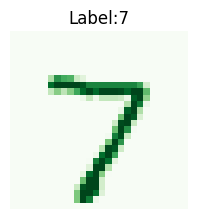

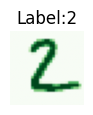

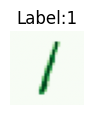

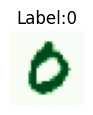

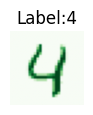

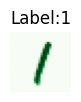

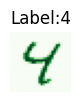

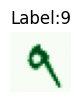

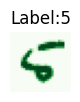

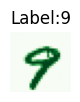

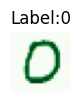

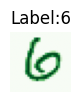

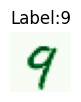

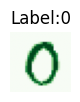

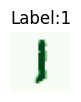

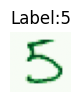

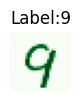

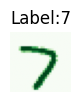

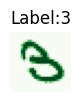

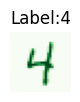

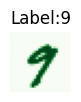

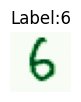

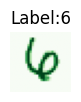

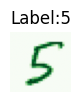

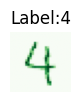

C:\jupyter\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9255 - loss: 0.2595 - val_accuracy: 0.9605 - val_loss: 0.1348
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9658 - loss: 0.1145 - val_accuracy: 0.9709 - val_loss: 0.1003
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9761 - loss: 0.0788 - val_accuracy: 0.9710 - val_loss: 0.0914
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9818 - loss: 0.0596 - val_accuracy: 0.9771 - val_loss: 0.0737
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9855 - loss: 0.0461 - val_accuracy: 0.9768 - val_loss: 0.0735
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9768 - loss: 0.0735
Test Accuracy:0.9768000245094299
Test loss:0.07350187748670578
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9894 - loss: 0.0355 - val_accuracy: 0.9857 - val_loss: 0.0426
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9919 - lo

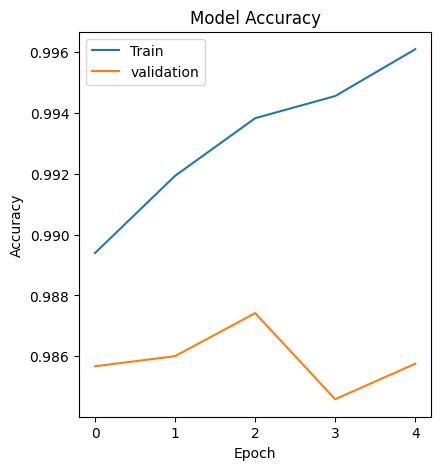

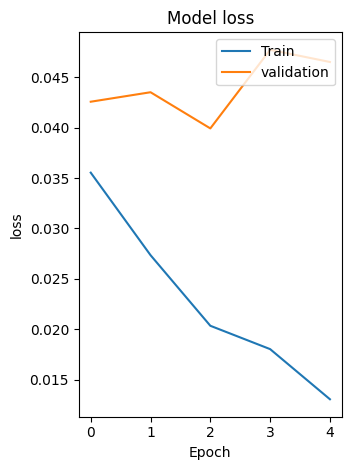

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
df = pd.read_csv("insurance.csv")
print(df.head())
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
(_,_),(x_test,y_test)=mnist.load_data()
plt.figure(figsize=(10,10))
for i in range(25):
     plt.subplot(5,5,i+1)
     plt.imshow(x_test[i],cmap='Greens')
     plt.title(f'Label:{y_test[i]}')
     plt.axis('off')
     plt.tight_layout()
     plt.show()
x_train.shape
x_test.shape
y_train.shape
y_test.shape
x_train,x_test=x_train/255.0,x_test/255.0
x_train_flat=x_train.reshape(x_train.shape[0],-1)
x_test_flat=x_test.reshape(x_test.shape[0],-1)
x_train_flat
x_test_flat
model=Sequential([         
Flatten(input_shape=(28,28)),
Dense(128,activation='relu'),
Dense(10,activation='softmax')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_test,y_test))
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f'Test Accuracy:{test_accuracy}')
print(f'Test loss:{test_loss}')
history=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','validation'],loc='upper left')
plt.show()
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train','validation'],loc='upper right')
plt.tight_layout()
plt.show()